In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy.spatial.distance import squareform
import palsgraph

#### Load distance matrix

In [2]:
simfilename = 'test.tsv'

X = np.genfromtxt(simfilename, delimiter='\t', encoding='utf8', dtype=None)

labels = []
for label in [x[0] for x in X]:
    if label in labels:
        continue
    labels.append(label)
for label in [x[1] for x in X]:
    if label in labels:
        continue
    labels.append(label)

dismat = squareform([x[2] for x in X])
dismat

array([[0.      , 1.      , 1.      , ..., 1.      , 0.944444, 1.      ],
       [1.      , 0.      , 0.944444, ..., 1.      , 0.736842, 1.      ],
       [1.      , 0.944444, 0.      , ..., 0.888889, 0.947368, 1.      ],
       ...,
       [1.      , 1.      , 0.888889, ..., 0.      , 0.947368, 0.947368],
       [0.944444, 0.736842, 0.947368, ..., 0.947368, 0.      , 0.95    ],
       [1.      , 1.      , 1.      , ..., 0.947368, 0.95    , 0.      ]])

#### Construct graph

In [3]:
threshold = 0.77 # Replace this with your choice of threshold
adjmat = dismat.copy()
np.fill_diagonal(adjmat, np.min(dismat)) # Set the diagonal elements to a small value so that they won't be zeroed out
adjmat = adjmat.reshape((-1,))
adj = (adjmat <= threshold)
adjmat[adjmat > threshold] = 0
adjmat[adj] = 1
print("{} out of {} values set to zero".format(len(adjmat[adjmat == 0]), len(adjmat)))
adjmat = adjmat.reshape(dismat.shape)

G = palsgraph.make_graph(adjmat, labels=labels)

14102 out of 14641 values set to zero


#### Community detection using Girvan-Newman

Possibility 1 : 

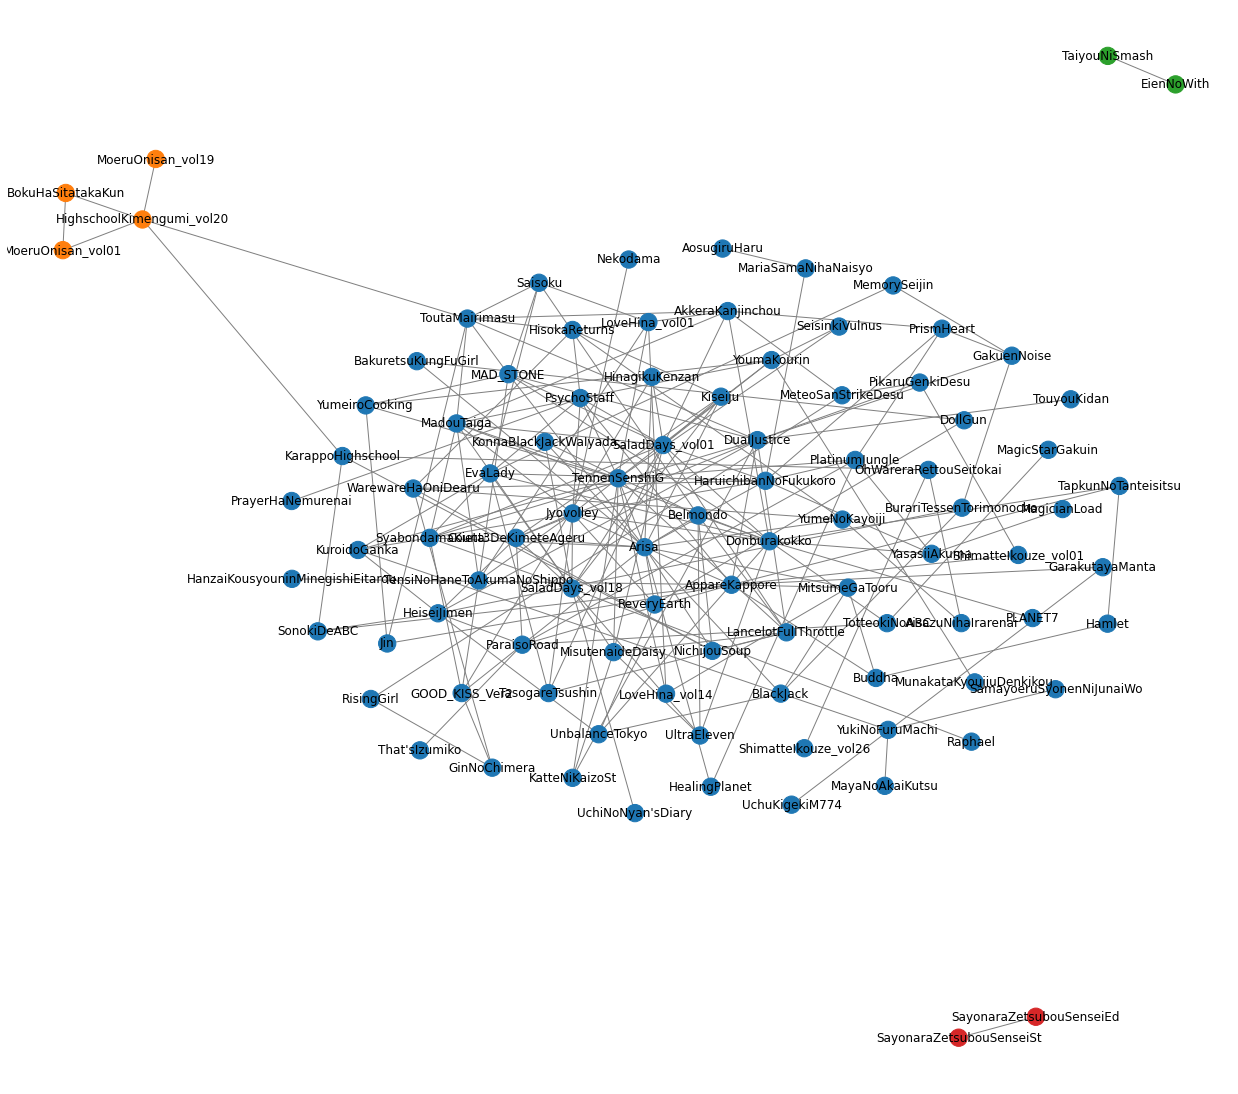

Possibility 2 : 

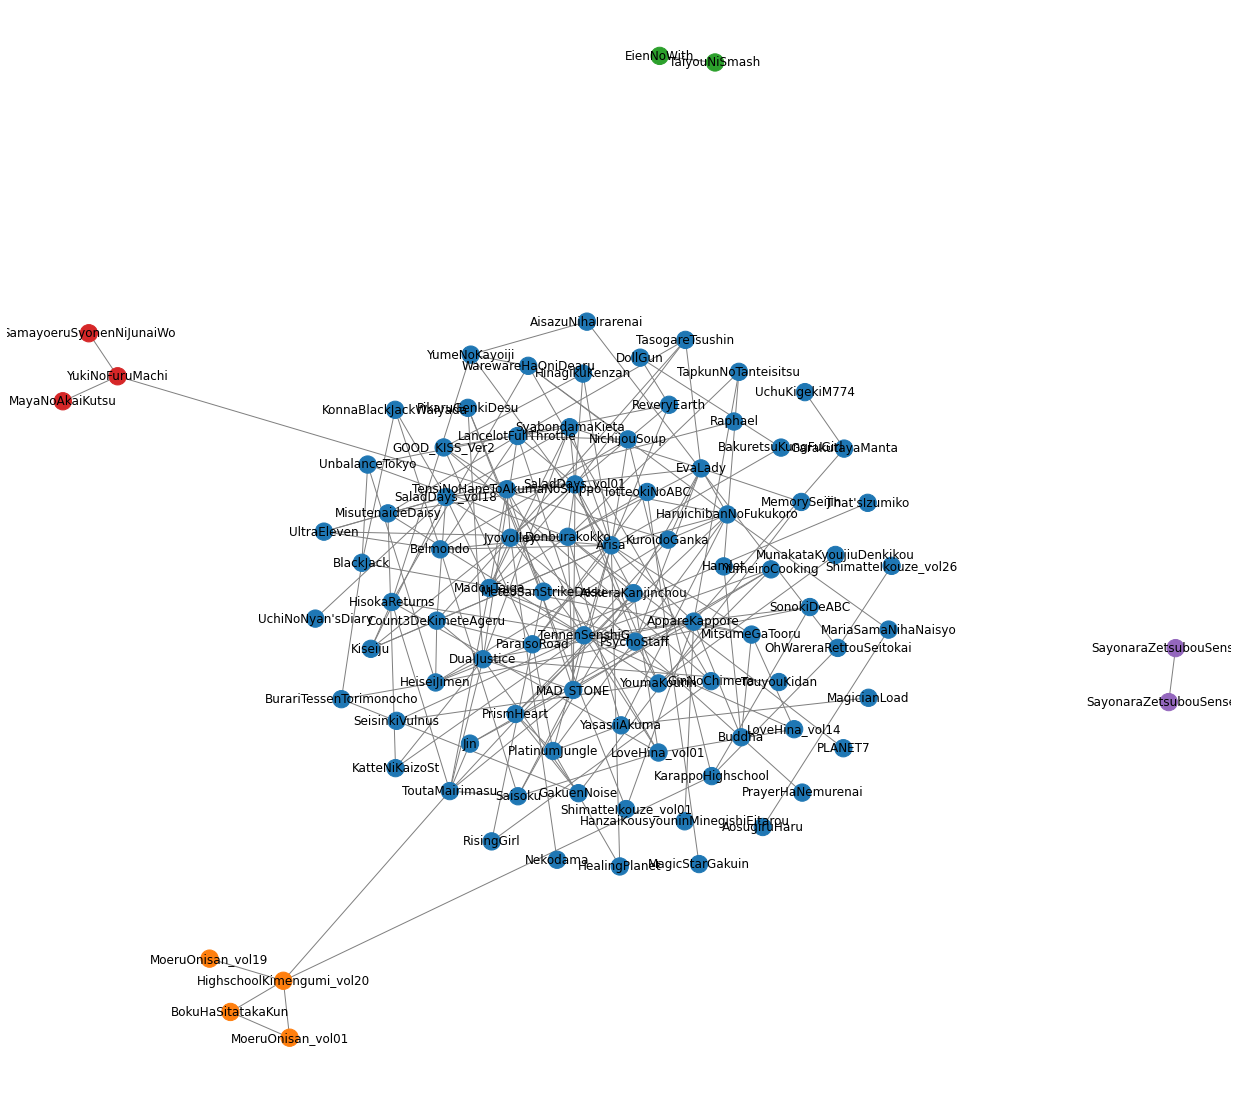

Possibility 3 : 

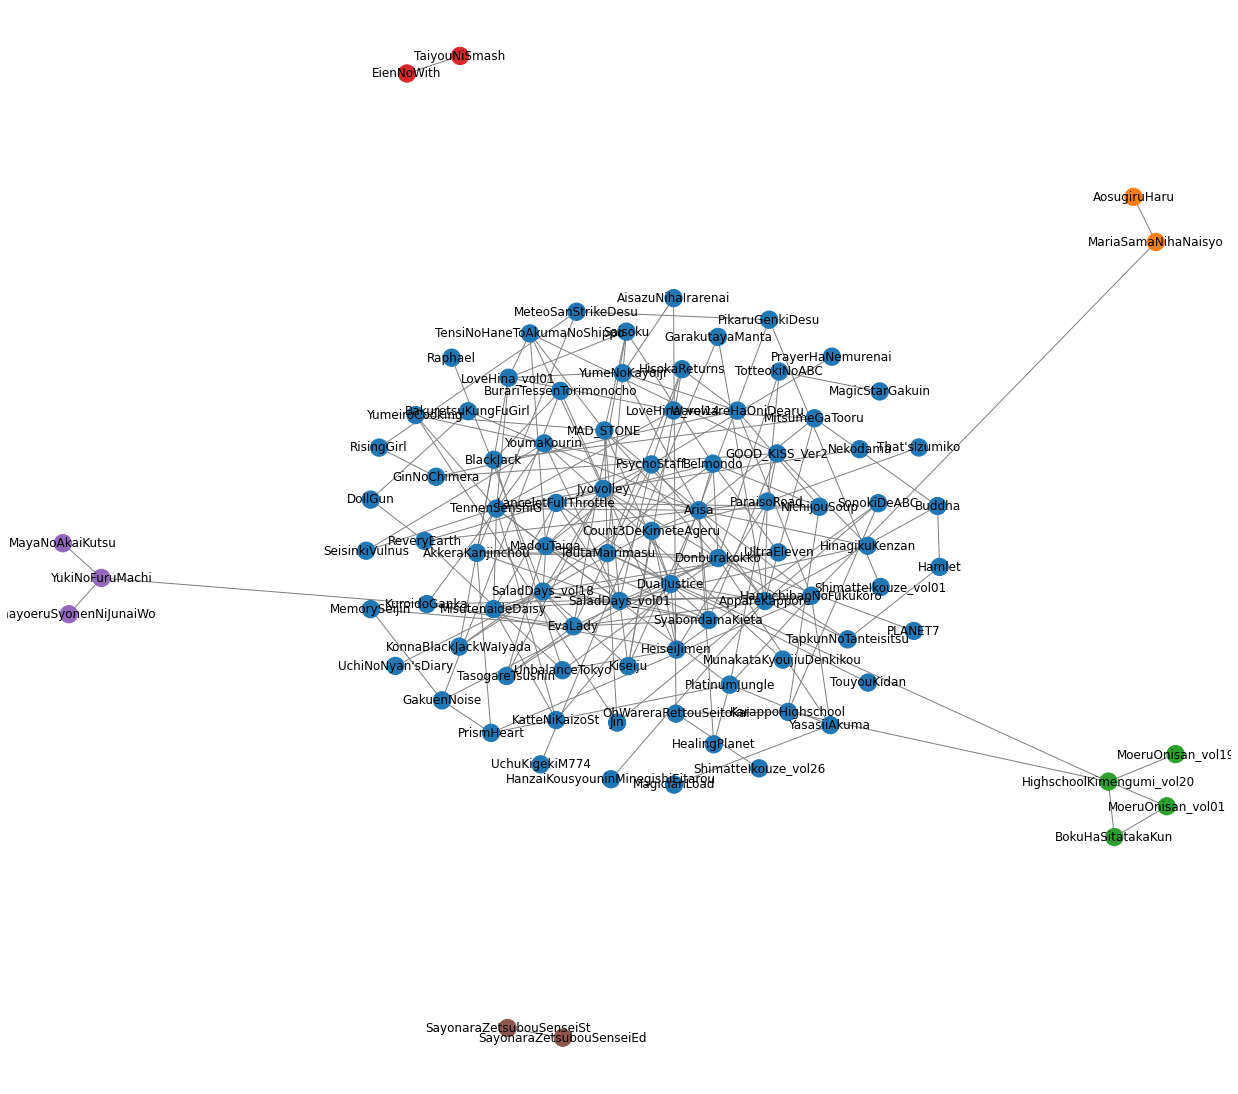

In [4]:
from networkx.algorithms.community.centrality import girvan_newman

comp = girvan_newman(G)

max_shown = 3
shown_count = 1
possibilities = []
for communities in itertools.islice(comp, max_shown):
    print("Possibility", shown_count, ": ", end='')

    pos = palsgraph.getpos(G, communities)
    color_map = palsgraph.gen_colormap(G, communities)

    shown_count += 1

    plt.figure(figsize=(17, 15))
    nx.draw(G, pos=pos, node_color=color_map, edge_color='grey', with_labels=True)
    plt.show()